In [1]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
nernlp = stanza.Pipeline('en', package='craft', processors={'ner': 'BioNLP13CG'})
pretokenized_biomedicalnlp = stanza.Pipeline(lang='en', package='craft', tokenize_pretokenized=True) 


2022-04-09 13:45:32 INFO: Loading these models for language: en (English):
| Processor | Package    |
--------------------------
| tokenize  | craft      |
| pos       | craft      |
| lemma     | craft      |
| depparse  | craft      |
| ner       | bionlp13cg |

2022-04-09 13:45:32 INFO: Use device: cpu
2022-04-09 13:45:32 INFO: Loading: tokenize
2022-04-09 13:45:32 INFO: Loading: pos
2022-04-09 13:45:32 INFO: Loading: lemma
2022-04-09 13:45:32 INFO: Loading: depparse
2022-04-09 13:45:32 INFO: Loading: ner
2022-04-09 13:45:33 INFO: Done loading processors!
2022-04-09 13:45:33 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | craft   |
| pos       | craft   |
| lemma     | craft   |
| depparse  | craft   |

2022-04-09 13:45:33 INFO: Use device: cpu
2022-04-09 13:45:33 INFO: Loading: tokenize
2022-04-09 13:45:33 INFO: Loading: pos
2022-04-09 13:45:33 INFO: Loading: lemma
2022-04-09 13:45:33 INFO: Loading: depparse
2022-

In [3]:
f = open('train.txt') # contains only two extracts for demonstration purpose
paragraphs = f.readlines()
for para in paragraphs:
    print (para)

﻿MET is a receptor tyrosine kinase (RTK) activated by binding to its ligand, Hepatocyte growth factor/Scatter factor (HGF/SF). Similar to other related RTKs, such as EGFR, ligand binding induces MET dimerization and trans-autophosphorylation, resulting in the active MET receptor complex. Phosphorylated tyrosines in the cytoplasmic tail of MET serve as docking sites for binding of adapter proteins, such as GRB2, SHC1 and GAB1, which trigger signal transduction cascades that activate PI3K/AKT, RAS, STAT3, PTK2, RAC1 and RAP1 signalling. Activation of PLC gamma 1 (PLCG1) signalling by MET remains unclear. It has been reported that PLCG1 can bind to MET directly or be recruited by phosphorylated. Tyrosine residue Y307 of GAB1 that serves as docking sites for PLCG1 may be phosphorylated either by activated MET or SRC. Another PCLG1 docking site on GAB1, tyrosine residue Y373, was reported as the SRC target, while the kinase for the main PLCG1 docking site, Y407 of GAB1, is not known. Signal

In [4]:
%%time
# collect sentences from paragraphs:
sentences = []
for para in paragraphs:
    lines = para.split('. ')
    for l in lines:
        if '\ufeff' in l:
            sentences.append(l.replace('\ufeff','')+'.')
        else:
            sentences.append(l+'.')
    

CPU times: user 139 µs, sys: 1e+03 ns, total: 140 µs
Wall time: 145 µs


In [5]:
len(sentences), sentences[0:10]

(89,
 ['MET is a receptor tyrosine kinase (RTK) activated by binding to its ligand, Hepatocyte growth factor/Scatter factor (HGF/SF).',
  'Similar to other related RTKs, such as EGFR, ligand binding induces MET dimerization and trans-autophosphorylation, resulting in the active MET receptor complex.',
  'Phosphorylated tyrosines in the cytoplasmic tail of MET serve as docking sites for binding of adapter proteins, such as GRB2, SHC1 and GAB1, which trigger signal transduction cascades that activate PI3K/AKT, RAS, STAT3, PTK2, RAC1 and RAP1 signalling.',
  'Activation of PLC gamma 1 (PLCG1) signalling by MET remains unclear.',
  'It has been reported that PLCG1 can bind to MET directly or be recruited by phosphorylated.',
  'Tyrosine residue Y307 of GAB1 that serves as docking sites for PLCG1 may be phosphorylated either by activated MET or SRC.',
  'Another PCLG1 docking site on GAB1, tyrosine residue Y373, was reported as the SRC target, while the kinase for the main PLCG1 docking sit

In [6]:
def consolidatedPassV2(doc):
    retokenized_txt = []
    for sent in doc.sentences:
        count = 0
        while count < len(sent.words):
            if count+1<len(sent.words) and sent.words[count].xpos == 'VBN' and sent.words[count+1].upos=='NOUN':
                #print (sent.words[count].text, sent.words[count].upos, sent.words[count+1].text, sent.words[count+1].upos)
                retokenized_txt.append(' '.join([sent.words[count].text, sent.words[count+1].text]))
                count +=2
            elif count+1<len(sent.words) and sent.words[count].xpos == 'NN' and sent.words[count+1].xpos=='NNS':
                #print (count, sent.words[count].text, sent.words[count+1].text)
                retokenized_txt.append(' '.join([sent.words[count].text, sent.words[count+1].text]))
                count +=2
#            elif count+1<len(sent.words) and sent.words[count].xpos == 'VBZ' and sent.words[count+1].xpos=='VBN':
#                #print (count, sent.words[count].text, sent.words[count+1].text)
#                retokenized_txt.append(' '.join([sent.words[count].text, sent.words[count+1].text]))
#                count +=2
            elif count+1<len(sent.words) and sent.words[count].upos == 'ADJ' and sent.words[count+1].upos=='NOUN':
                #print (count, sent.words[count].text, sent.words[count+1].text)
                retokenized_txt.append(' '.join([sent.words[count].text, sent.words[count+1].text]))
                count +=2
            elif count+1<len(sent.words) and sent.words[count].upos == 'PROPN' and sent.words[count+1].upos=='NUM':
                #print (count, sent.words[count].text, sent.words[count+1].text)
                retokenized_txt.append(' '.join([sent.words[count].text, sent.words[count+1].text]))
                count +=2
            elif count+1<len(sent.words) and sent.words[count].upos == 'PROPN' and sent.words[count+1].upos=='PROPN':
                #print (count, sent.words[count].text, sent.words[count+1].text)
                retokenized_txt.append(' '.join([sent.words[count].text, sent.words[count+1].text]))
                count +=2
            elif count+1<len(sent.words) and sent.words[count].upos == 'PROPN' and sent.words[count+1].upos=='NOUN':
                #print (count, sent.words[count].text, sent.words[count+1].text)
                retokenized_txt.append(' '.join([sent.words[count].text, sent.words[count+1].text]))
                count +=2                
            elif count+1<len(sent.words) and sent.words[count].upos == 'NOUN' and sent.words[count+1].upos=='NOUN':
                #print (sent.words[count].text, sent.words[count].upos, sent.words[count+1].text, sent.words[count+1].upos)
                retokenized_txt.append(' '.join([sent.words[count].text, sent.words[count+1].text]))
                count +=2
            elif count+1<len(sent.words) and sent.words[count].upos == 'NOUN' and sent.words[count+1].upos=='NUM':
                #print (sent.words[count].text, sent.words[count].upos, sent.words[count+1].text, sent.words[count+1].upos)
                retokenized_txt.append(' '.join([sent.words[count].text, sent.words[count+1].text]))
                count +=2
            elif count+1<len(sent.words) and sent.words[count].upos == 'NOUN' and sent.words[count+1].text=='-':
                retokenized_txt.append(''.join([sent.words[count].text, sent.words[count+1].text]))
                count +=2
            elif count+2<len(sent.words) and sent.words[count].upos == 'NOUN' and sent.words[count+1].upos=='X':
                retokenized_txt.append(''.join([sent.words[count].text, sent.words[count+1].text]))
                count +=2
            else:
                #print (sent.words[count].text)
                retokenized_txt.append(sent.words[count].text)
                count +=1
    return retokenized_txt

def dynamicTokenizer(nlp=pretokenized_biomedicalnlp, Pass=consolidatedPassV2, text=''):
    interim = text.replace('.',' #').replace(' .',' #') #replace(',',' ,').replace(';',' ;').replace('(','').replace(')','')
    #interim = interim[:-1]+' . #'
    pretokenized_sent = interim.split(' ')
    #print (pretokenized_sent)
    doc = nlp([pretokenized_sent])
    prev_size = len(pretokenized_sent)
    while True:
        pretokenized_sent = Pass(doc) # Key helper function
        doc = nlp([pretokenized_sent])
        next_size = len([word.text for sent in doc.sentences for word in sent.words])
        print ('Prev size: %i Vs. Next size %i' %(prev_size, next_size))
        if next_size == prev_size:
            break
        else:
            prev_size=next_size
    return doc

def plot_network(graph):
    plt.figure(figsize=(20,20))
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos, node_color='r')
    nx.draw_networkx_labels(graph, pos, font_size = 14)
    nx.draw_networkx_edges(graph, pos, edge_color='b')
    plt.show()

def contract(g):
    if '#' in g.nodes:
        for n in g.neighbors('#'):
            if g.nodes[n]['nature']=='VERB' or g.nodes[n]['nature']=='PART' or g.nodes[n]['nature']=='AUX' or g.nodes[n]['nature']=='NOUN' or g.nodes[n]['nature']=='PROPN':
                h = nx.contracted_nodes(g, n, '#')
                return h
            else:
                return g
    else:
        return g

def createTokenGraphwithContraction(doc):
    g = nx.DiGraph()
    # dependency chain that reflects the connection between words based on POS, order not conserved
    for sent in doc.sentences: 
        for word in sent.words:
            tail = word.text
            tail_dep = word.deprel
            tail_nature = word.upos
            head = sent.words[word.head-1].text
            head_dep = sent.words[word.head-1].deprel
            head_nature = sent.words[word.head-1].upos
            g.add_node(head, pos=head_dep, nature=head_nature, weight=1)
            g.add_node(tail, pos=tail_dep, nature=tail_nature, weight=1)
            g.add_edge(head, tail, weight=1)
    # linear chain that reflects the order of words in the sentence
    for sent in doc.sentences: 
        for i in range(len(sent.words)-1):
            g.add_edge(sent.words[i].text, sent.words[i+1].text, weight=1)
    h = contract(g)
    return h
    
    
def sandbox(string):
    """
    To compare the sentence outputs between using stanza standard NLP pipeline and using custom dyanmic tokenizer
    """
    print (string)
    print ("********************** Convergence ***************************")
    doc = dynamicTokenizer(text=string)
    doc_original = nernlp(string)
    print ("************************ ReTokenized *************************")
    printDoc(doc)
    print ("************************ Original ****************************")
    printDoc(doc_original)
    print ("******************** Undirected Graph ************************")
    H = createTokenGraphwithContraction(doc)
    plot_network(H)
    return H
    
def printDoc(doc):
    print(*[f'id: {word.id}\tword: {word.text.ljust(20, " ")}\tdeprel: {word.deprel.ljust(8, " ")}\tupos: {word.upos.ljust(6, " ")}\thead: {sent.words[word.head-1].text.ljust(20, " ") if word.head > 0 else "root"}' for sent in doc.sentences for word in sent.words], sep='\n')
    

MET is a receptor tyrosine kinase (RTK) activated by binding to its ligand, Hepatocyte growth factor/Scatter factor (HGF/SF).
********************** Convergence ***************************
Prev size: 19 Vs. Next size 14
Prev size: 14 Vs. Next size 12
Prev size: 12 Vs. Next size 11
Prev size: 11 Vs. Next size 11
************************ ReTokenized *************************
id: 1	word: MET                 	deprel: nsubj   	upos: VERB  	head: receptor tyrosine kinase (RTK)
id: 2	word: is                  	deprel: cop     	upos: VERB  	head: receptor tyrosine kinase (RTK)
id: 3	word: a                   	deprel: det     	upos: DET   	head: receptor tyrosine kinase (RTK)
id: 4	word: receptor tyrosine kinase (RTK)	deprel: root    	upos: NOUN  	head: root
id: 5	word: activated           	deprel: acl     	upos: VERB  	head: receptor tyrosine kinase (RTK)
id: 6	word: by                  	deprel: mark    	upos: SCONJ 	head: binding             
id: 7	word: binding             	deprel: advcl   	

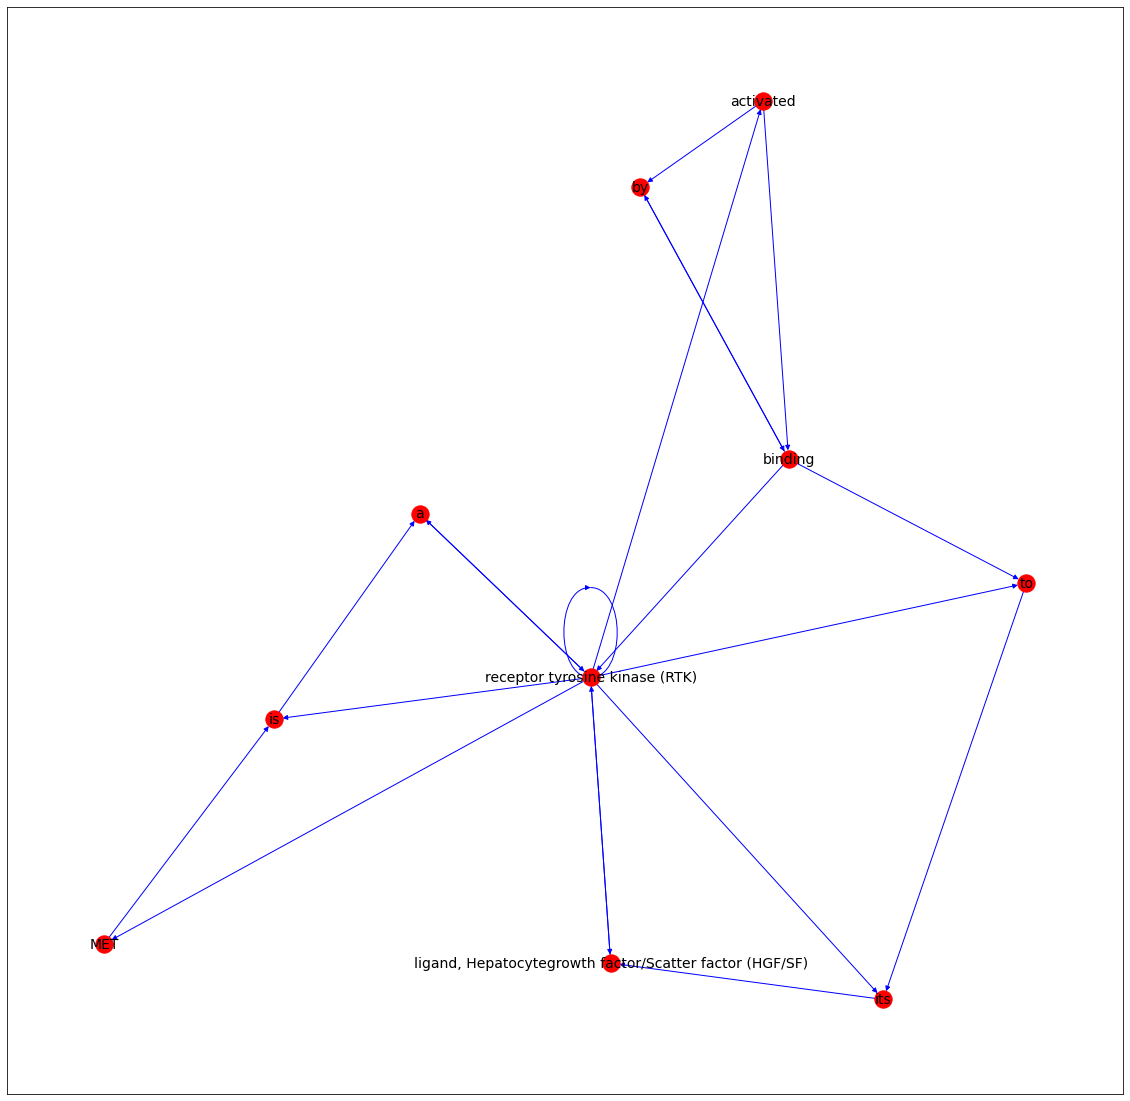

In [7]:
g = sandbox(sentences[0])

In [8]:
nodes = g.nodes()
nature = nx.get_node_attributes(g, 'nature')
nature

{'receptor tyrosine kinase (RTK)': 'NOUN',
 'MET': 'VERB',
 'is': 'VERB',
 'a': 'DET',
 'activated': 'VERB',
 'binding': 'VERB',
 'by': 'SCONJ',
 'to': 'ADP',
 'its': 'PRON',
 'ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)': 'NOUN'}

In [12]:
# Let's assume I want to establish a relationship between 
# 'receptor tyrosine kinase (RTK)' and 'ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)' that involves an 'action'.

for index, path in enumerate(nx.all_simple_paths(g, source='receptor tyrosine kinase (RTK)', target='ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)')):
    print(index+1, '->', path)


1 -> ['receptor tyrosine kinase (RTK)', 'activated', 'binding', 'to', 'its', 'ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)']
2 -> ['receptor tyrosine kinase (RTK)', 'activated', 'by', 'binding', 'to', 'its', 'ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)']
3 -> ['receptor tyrosine kinase (RTK)', 'to', 'its', 'ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)']
4 -> ['receptor tyrosine kinase (RTK)', 'its', 'ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)']
5 -> ['receptor tyrosine kinase (RTK)', 'ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)']


From above, it's clear that only first and second paths contain verbs such as "activated' or 'binding' that will make sense of the relationship of these two entities.

Given that, following relationship will meet the predicate logic's contruction logic: 
1. <b>activated</b>('receptor tyrosine kinase (RTK)', 'ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)')
2. <b>binding</b>('receptor tyrosine kinase (RTK)', 'ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)')

Based on above, I figure the closet schema would be the one employed in <b>bc5cdr</b> and following would be an example to demonstrate how I would like to present that extraction.

In [ ]:
            features = datasets.Features(
                {
                    "passages": [
                        {
                            "document_id": text_1,
                            "type": str,
                            "text": 'MET is a receptor tyrosine kinase (RTK) activated by binding to its ligand, Hepatocyte growth factor/Scatter factor (HGF/SF).',
                            "entities": [
                                {
                                    "id": 'e1',
                                    "offsets": [[9, 39]],
                                    "text": ['receptor tyrosine kinase (RTK)'],
                                    "type": str,
                                }
                                {
                                    "id": 'e2',
                                    "offsets": [[68, 123]],
                                    "text": ['ligand, Hepatocytegrowth factor/Scatter factor (HGF/SF)'],
                                    "type": str,
                                }
                            ],
                            "relations": [
                                {
                                    "id": 'r1',
                                    "type": 'activated',
                                    "arg1_id": 'e1',
                                    "arg2_id": 'e2',
                                }
                            ],
                        }
                    ]
                }
            )


Multiple relationships will be extracted for this single sentence, which is one for 'activated' and one for 'binding'.